
# Project: Investigate a Data Set about football in Europe

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> A data base included 8 tables 
> DataBase is available on Kaggle [here](https://www.kaggle.com/datasets/hugomathien/soccer)
- the 8 tables are merged to create 3 main Data Frames



### Questions for Analysis
<li> Which League & Season have more goals?</li>
<li> Relation betwen home team goals and away team goals </i>
<li> What are main factors contributes that a player to get higher rating? </li>
<li> What is the common play style in each League?</li>

In [2]:
#Imporing libiraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> Reading the tables into DataFrames


In [3]:
# Loading data, exploring each head
player_attributes = pd.read_csv('Player_Attributes.csv')
country = pd.read_csv('Country.csv')
league = pd.read_csv('League.csv')
match = pd.read_csv('Match.csv')
player = pd.read_csv('Player.csv')
team = pd.read_csv('Team.csv')
team_attributes = pd.read_csv('Team_Attributes.csv')

In [4]:
print("player attrributes shape: " , player_attributes.shape)
print("country shape: " , country.shape)
print("league shape: " , league.shape)
print("match: " , match.shape)
print("player shape: " , player.shape)
print("team shape: " , team.shape)
print("team_attributes shape: " , team_attributes.shape)

player attrributes shape:  (183978, 42)
country shape:  (11, 2)
league shape:  (11, 3)
match:  (25979, 115)
player shape:  (11060, 7)
team shape:  (299, 5)
team_attributes shape:  (1458, 25)


In [5]:
display(player_attributes.head(), country.head(), league.head(), match.head(), player.head(), team.head(), team_attributes.head())

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover



### Data Cleaning

 

In [6]:
# Merging country and league data frames in one tables 
country_league= pd.concat([country, league], axis=1)
country_league.columns.values[1] = 'country_name'
country_league.columns.values[4] = 'league_name'

country_league.head()

,id,country_name,id,country_id,league_name
0,1,Belgium,1,1,Belgium Jupiler League
1,1729,England,1729,1729,England Premier League
2,4769,France,4769,4769,France Ligue 1
3,7809,Germany,7809,7809,Germany 1. Bundesliga
4,10257,Italy,10257,10257,Italy Serie A


In [7]:
# several operations of merging took a place in the data frame of matches
# to be clear who is the home team and away team 
matchMod1= pd.merge(country_league, match, on='country_id')
matchMod1 = matchMod1.drop(['id_x', 'id_x', 'country_id', 'id_y', 'league_id'], axis=1)

matchMod2 = pd.merge(matchMod1, team, left_on='home_team_api_id', right_on='team_api_id')
matchMod2 = matchMod2.drop(['id', 'team_api_id', 'team_fifa_api_id', 'team_short_name'], axis=1)
matchMod2.columns.values[-1] = 'home_team_name'

matchMod3 = pd.merge(matchMod2, team, left_on='away_team_api_id', right_on='team_api_id')
matchMod3 = matchMod3.drop(['id', 'team_api_id', 'team_fifa_api_id', 'team_short_name'], axis=1)
matchMod3.columns.values[-1] = 'away_team_name'

#dropin unnessasary columns
matchMod3 = matchMod3.drop(['home_team_api_id', 'away_team_api_id'], axis=1)

#selecting important columns to work on
matchMod3 = matchMod3.iloc[:,np.r_[0:8 ,112, 113]]
matchMod3 = matchMod3.dropna()

# Creating a new column of the sum of scored goals in each match
matchMod3['total_goals'] = matchMod3['home_team_goal'] + matchMod3['away_team_goal'] 
matchMod3.head()

,country_name,league_name,season,stage,date,match_api_id,home_team_goal,away_team_goal,home_team_name,away_team_name,total_goals
0,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,492473,1,1,KRC Genk,Beerschot AC,2
1,Belgium,Belgium Jupiler League,2009/2010,5,2009-08-30 00:00:00,665353,1,1,KRC Genk,Beerschot AC,2
2,Belgium,Belgium Jupiler League,2010/2011,1,2010-08-01 00:00:00,838476,2,1,KRC Genk,Beerschot AC,3
3,Belgium,Belgium Jupiler League,2011/2012,1,2011-07-30 00:00:00,1032694,3,1,KRC Genk,Beerschot AC,4
4,Belgium,Belgium Jupiler League,2012/2013,11,2012-10-20 00:00:00,1224064,3,0,KRC Genk,Beerschot AC,3


In [8]:
#creating a Data frame includes players attributes 
player_attributesMod = pd.merge(player, player_attributes, on='player_api_id')
player_attributesMod = player_attributesMod.drop(['id_x', 'player_api_id', 'player_fifa_api_id_x', 'id_y', 'player_fifa_api_id_y'], axis=1) 

#selecting important columns to work on and droping missing values
player_attributesMod = player_attributesMod.iloc[:, np.r_[0:13, 20:21, 28:29, 33, 17, 18]]
player_attributesMod  = player_attributesMod.dropna()
player_attributesMod.head()



,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,acceleration,strength,vision,free_kick_accuracy,long_passing
0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,60.0,76.0,54.0,39.0,64.0
1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,60.0,76.0,54.0,39.0,64.0
2,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,60.0,76.0,54.0,39.0,64.0
3,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,76.0,53.0,38.0,63.0
4,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,76.0,53.0,38.0,63.0


In [9]:
#creating a Data frame includes each team attributes
team_attributesMod = pd.merge(team, team_attributes, on='team_api_id')

team_attributesMod = team_attributesMod.iloc[:,np.r_[3,4,7:10,13,14,21:26]]
team_attributesMod.head()

,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass
0,KRC Genk,GEN,2010-02-22 00:00:00,45,Balanced,Mixed,Organised,Organised,70,High,65,Press
1,KRC Genk,GEN,2011-02-22 00:00:00,66,Balanced,Mixed,Organised,Organised,48,Medium,47,Press
2,KRC Genk,GEN,2012-02-22 00:00:00,53,Balanced,Mixed,Organised,Organised,47,Medium,45,Press
3,KRC Genk,GEN,2013-09-20 00:00:00,58,Balanced,Mixed,Organised,Organised,47,Medium,45,Press
4,KRC Genk,GEN,2014-09-19 00:00:00,58,Balanced,Mixed,Organised,Organised,47,Medium,45,Press


In [10]:
# adding a column identfies in which league each team plays for

temp1 = matchMod3.iloc[:, np.r_[1,8]]
team_attributesMod0 = pd.merge(temp1, team_attributesMod, left_on='home_team_name', right_on='team_long_name')
team_attributesMod0 = team_attributesMod0.drop(['home_team_name', 'team_short_name'], axis=1)
team_attributesMod0 = team_attributesMod0.dropna()
team_attributesMod0.head()

,league_name,team_long_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass
0,Belgium Jupiler League,KRC Genk,2010-02-22 00:00:00,45,Balanced,Mixed,Organised,Organised,70,High,65,Press
1,Belgium Jupiler League,KRC Genk,2011-02-22 00:00:00,66,Balanced,Mixed,Organised,Organised,48,Medium,47,Press
2,Belgium Jupiler League,KRC Genk,2012-02-22 00:00:00,53,Balanced,Mixed,Organised,Organised,47,Medium,45,Press
3,Belgium Jupiler League,KRC Genk,2013-09-20 00:00:00,58,Balanced,Mixed,Organised,Organised,47,Medium,45,Press
4,Belgium Jupiler League,KRC Genk,2014-09-19 00:00:00,58,Balanced,Mixed,Organised,Organised,47,Medium,45,Press


<a id='eda'></a>
## Exploratory Data Analysis


### Which League & Season have more goals? 

In [11]:
matchMod3.shape

(25979, 11)

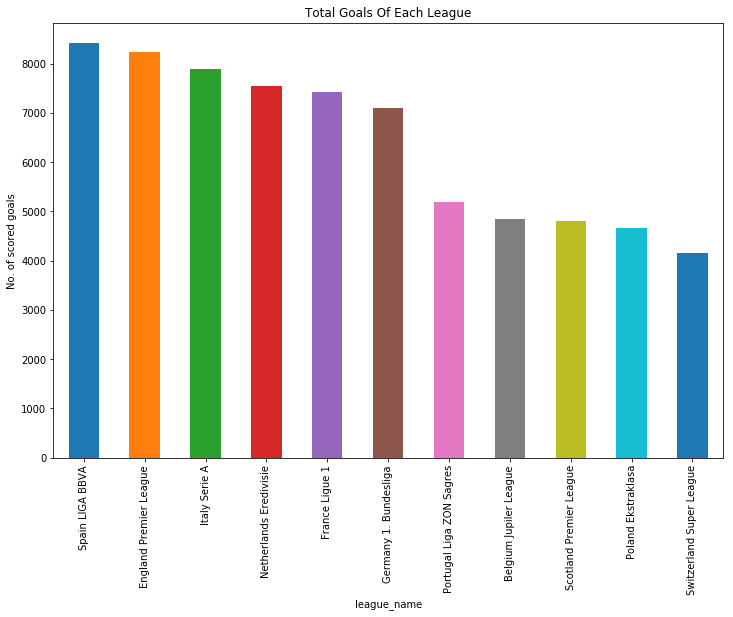

In [81]:
#ploting the DataFrame contains total goals of each league in this period of time
fig, axs = plt.subplots(figsize=(12, 8))
matchgroupbyleague = matchMod3.groupby('league_name')
matchgroupbyleague = matchgroupbyleague.sum().sort_values(by='total_goals', ascending=False)
matchgroupbyleague['total_goals'].plot(kind='bar')
axs.set_ylabel("No. of scored goals")
axs.set_title("Total Goals Of Each League");

<li> the spanish league (La Liga) had the most scored goals while Switzerland League was the lowest </li>

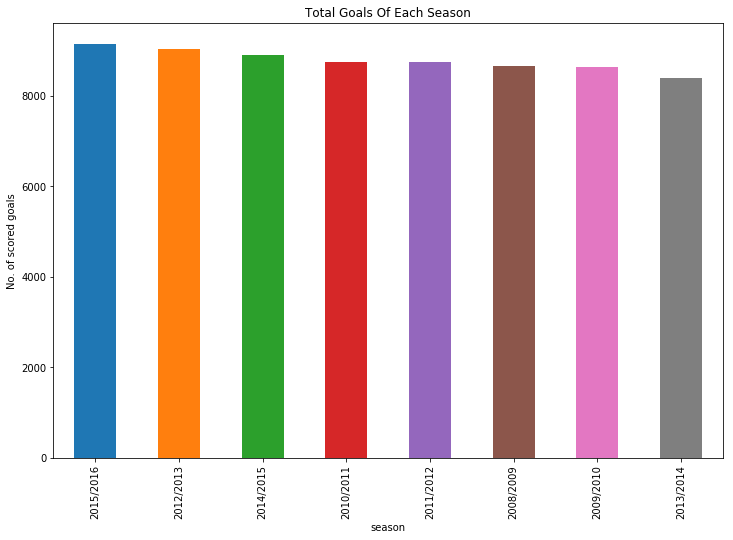

In [80]:
fig, axs = plt.subplots(figsize=(12, 8))
matchgroupbyseason = matchMod3.groupby('season').sum().sort_values(by='total_goals', ascending=False)
matchgroupbyseason['total_goals'].plot(kind='bar')
axs.set_ylabel("No. of scored goals")
axs.set_title("Total Goals Of Each Season");

<li> differences between seasons are not extreme however season 2015/2016 was the highest </li>

### Relation betwen home team goals and away team goals

In [58]:
matchMod3.shape

(25979, 11)

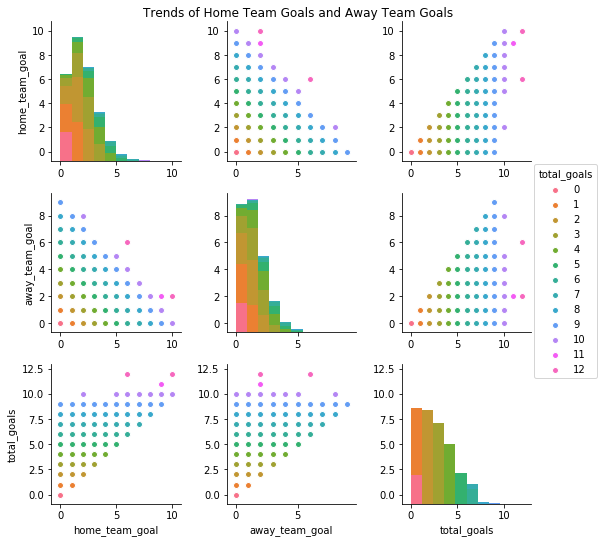

In [78]:
g = sns.pairplot(matchMod3[['home_team_goal', 'away_team_goal', 'total_goals']], hue="total_goals", hue_order=None)
g.fig.suptitle("Trends of Home Team Goals and Away Team Goals", y=1);

<li> It is shown that the relation is inversely proportional betwen home team goals and away team goals </li>

### What are main factors contributes that a player to get higher rating?

In [15]:
player_attributesMod.shape

(180354, 18)

In [16]:
# Selecting Top players with rate +85 to work on their stats
topPlayers = player_attributesMod[player_attributesMod['overall_rating']>85]
topPlayers.shape

(1086, 18)

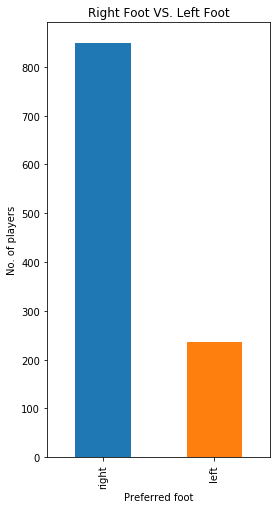

In [36]:
fig, axs = plt.subplots(figsize=(4, 8))
topPlayers['preferred_foot'].value_counts().plot(kind='bar')
axs.set_xlabel("Preferred foot")
axs.set_ylabel("No. of players") 
axs.set_title("Right Foot VS. Left Foot");

<li> player with high rates and preferred right foot nearly are 3 times as much as those who prefer their left foot </li>

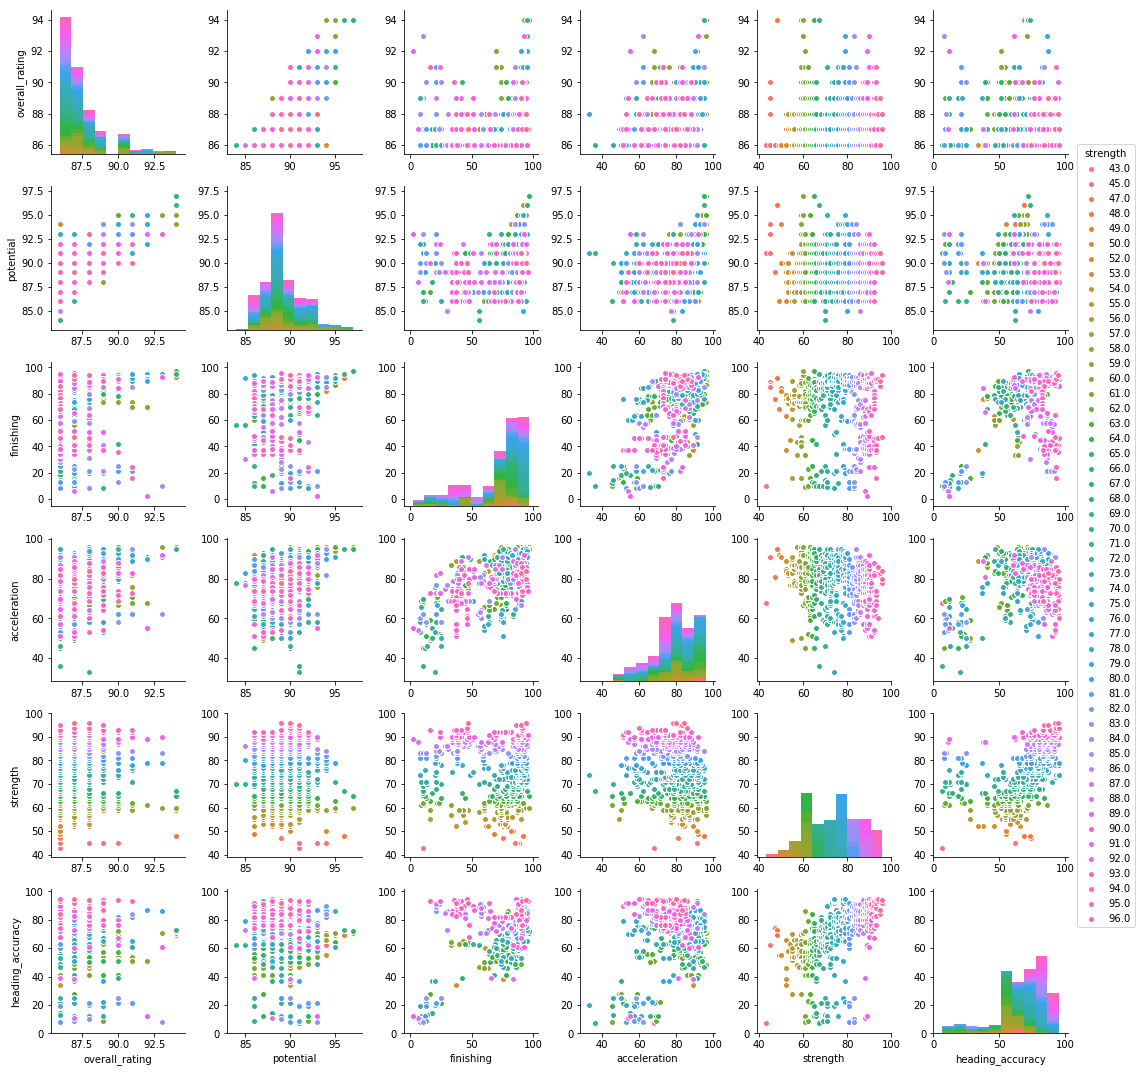

In [41]:
sns.pairplot(topPlayers[['overall_rating', 'potential', 'finishing', 'acceleration',  
             'strength', 'heading_accuracy']], hue="strength", hue_order=None, palette='husl')
plt.show()
                         

<li> Due To trends above, </li>
<li> Potential of players is directly proportional with Overall Rating, Finishing and Acceleration </i>
<li> The Finishing of players is directly proportional with Acceleration and Heading Accuracy </li>
<li> Faster players with high Acceleration are much stronger (Strength) </li>

### What is the common play style in each League?


In [19]:
team_attributesMod0.shape

(142830, 12)

In [20]:
teamAttGroupbyLeague = team_attributesMod0.groupby('league_name').mean() 
teamAttGroupbyLeague

,buildUpPlaySpeed,defencePressure,defenceAggression
league_name,,,
Belgium Jupiler League,53.533116,50.030434,52.024604
England Premier League,56.271875,45.041667,49.944792
France Ligue 1,53.267606,46.835320,49.071506
Germany 1. Bundesliga,56.969448,50.669800,51.507638
Italy Serie A,55.732968,42.794310,51.100507
Netherlands Eredivisie,45.862348,44.364372,46.956815
Poland Ekstraklasa,50.116743,49.935484,51.175115
Portugal Liga ZON Sagres,48.186367,41.694723,45.062190
Scotland Premier League,57.367974,47.466416,50.229984


<li> The mean of each League charachtaristics </li>

In [21]:
def sortby(mainDF, sortby):
    df = mainDF.sort_values(by= sortby, ascending=False)
    return df    

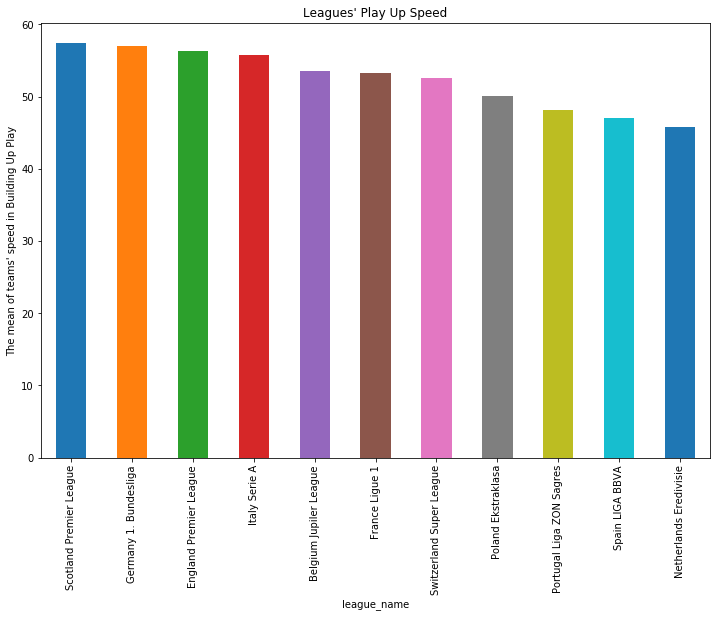

In [38]:
fig, axs = plt.subplots(figsize=(12, 8))
df1= sortby(teamAttGroupbyLeague,'buildUpPlaySpeed' )
df1['buildUpPlaySpeed'].plot(kind='bar')
axs.set_ylabel("The mean of teams' speed in Building Up Play")
axs.set_title("Leagues' Play Up Speed");


<li> Teams in Scotland Premier League tend to build play faster than other leagues </li>
<li> while Netherlands Eredivisie is the slowest </li>

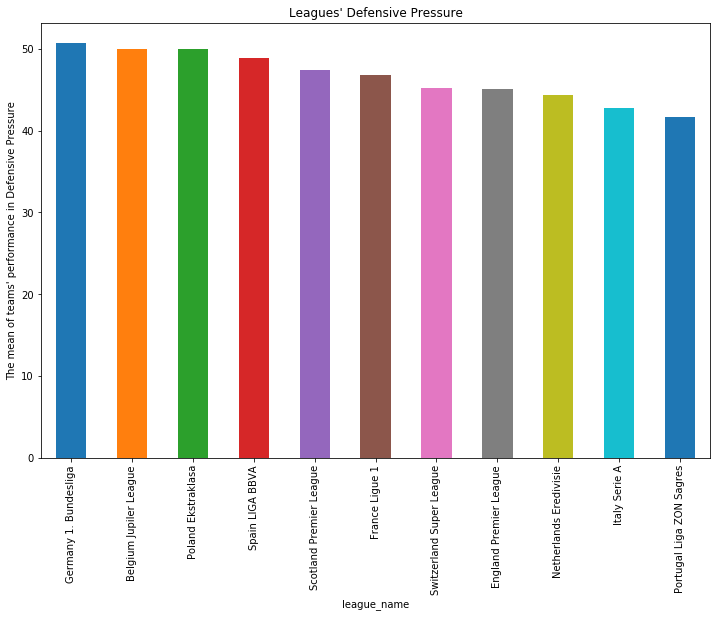

In [37]:
fig, axs = plt.subplots(figsize=(12, 8))
df2= sortby(teamAttGroupbyLeague,'defencePressure')
df2['defencePressure'].plot(kind='bar')
axs.set_ylabel("The mean of teams' performance in Defensive Pressure")
axs.set_title("Leagues' Defensive Pressure");

<li> Teams in Germany - Bundesliga have higher defenceve pressure than other leagues </li>
<li> while Portugal the weakest </li>

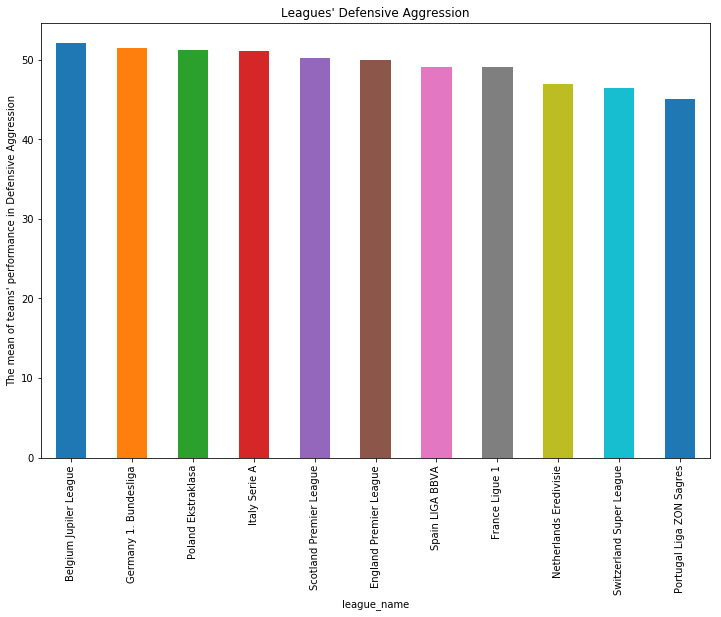

In [39]:
fig, axs = plt.subplots(figsize=(12, 8))
df3= sortby(teamAttGroupbyLeague,'defenceAggression')
df3['defenceAggression'].plot(kind='bar')
axs.set_ylabel("The mean of teams' performance in Defensive Aggression")
axs.set_title("Leagues' Defensive Aggression");

<li> Defensive Aggression is noticed to be higher in the Jupiter League </li>
<li> while Portugal is the least </li>

<a id='conclusions'></a>
# Conclusions

## Which League & Season have more goals?
##### Does it really matter for which league your team plays for so it is pretected to score and recieve more goals?
In the records of 25979 matches it was shown that the spanish league (La Liga) had the most scored goals while Switzerland League was the lowest. Adittionally, the differences between the scored goals in each season are not extreme however season 2015/2016 was the highest and 2013/2014 was the lowest.

## Relation betwen home team goals and away team goals
In the records of 25979 matches, It is noticed that the relation is inversely proportional betwen home team goals and away team goals while total goals is in it's maximum when both teams score many goals.

## What are main factors contributes that a player to get higher rating? 
##### Is there a relation between player's rating and their qualifications or they are just outliers?
In the records of 180354 player attributes, the highest with overall rating +85 were selected to be analyzed, which are 1086 record. The illustrations showed that, players with high rates and preferred right foot nearly are 3 times as much as those who prefer their left foot. Also, Potential of players is directly proportional with Overall Rating, Finishing and Acceleration. The Finishing of players is directly proportional with Acceleration and Heading Accuracy. Faster players with high Acceleration are much stronger (Strength). 

> The provided data was fruitful but more data about the players in their youg age could have provided more useful information as if their work out routines were provided and analyzed, it could reasult in a relation between their youth and their stats now. 

## What is the common play style in each League?
##### Does every country and league has it's own play style?
In the records of 142830 team's attributes, the characteristics of each league came out as follows:
> Teams in Scotland Premier League tend to build play faster than other leagues while Netherlands Eredivisie is the slowest.
Teams in Germany (Bundesliga) have higher defenceve pressure than other leagues while Portugal the weakest.
Defensive Aggression is noticed to be higher in the Jupiter League while Portugal is the least.


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])